# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports-an-data-load" data-toc-modified-id="Imports-an-data-load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports an data load</a></div><div class="lev1 toc-item"><a href="#Camera-Calibration" data-toc-modified-id="Camera-Calibration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Camera Calibration</a></div><div class="lev2 toc-item"><a href="#Load-set-of-chessboard-images-for-camera-calibration" data-toc-modified-id="Load-set-of-chessboard-images-for-camera-calibration-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load set of chessboard images for camera calibration</a></div><div class="lev2 toc-item"><a href="#Compute-camera-matrix-and-distortion-coefficients" data-toc-modified-id="Compute-camera-matrix-and-distortion-coefficients-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Compute camera matrix and distortion coefficients</a></div><div class="lev3 toc-item"><a href="#Explanation-of-custom-function-calibrate_camera" data-toc-modified-id="Explanation-of-custom-function-calibrate_camera-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Explanation of custom function <code>calibrate_camera</code></a></div><div class="lev2 toc-item"><a href="#Save-mtx-and-dist-to-pickle" data-toc-modified-id="Save-mtx-and-dist-to-pickle-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Save mtx and dist to pickle</a></div><div class="lev2 toc-item"><a href="#Example-of-undistorted-chessboard-image" data-toc-modified-id="Example-of-undistorted-chessboard-image-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Example of undistorted chessboard image</a></div><div class="lev1 toc-item"><a href="#Pipeline-(test-images)" data-toc-modified-id="Pipeline-(test-images)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pipeline (test images)</a></div><div class="lev2 toc-item"><a href="#Undistort:-Provide-an-example-of-a-distortion-corrected-image." data-toc-modified-id="Undistort:-Provide-an-example-of-a-distortion-corrected-image.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Undistort: Provide an example of a distortion-corrected image.</a></div><div class="lev2 toc-item"><a href="#Color-and-gradient-threshold" data-toc-modified-id="Color-and-gradient-threshold-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Color and gradient threshold</a></div><div class="lev3 toc-item"><a href="#Plot-combined-binary-image" data-toc-modified-id="Plot-combined-binary-image-321"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Plot combined binary image</a></div><div class="lev2 toc-item"><a href="#Perspective-transform" data-toc-modified-id="Perspective-transform-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Perspective transform</a></div><div class="lev3 toc-item"><a href="#Compute-Transformation-matrices-(direct-and-inverse-transformation)" data-toc-modified-id="Compute-Transformation-matrices-(direct-and-inverse-transformation)-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Compute Transformation matrices (direct and inverse transformation)</a></div><div class="lev3 toc-item"><a href="#Apply-transformation-to-an-image" data-toc-modified-id="Apply-transformation-to-an-image-332"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Apply transformation to an image</a></div><div class="lev2 toc-item"><a href="#Detect-lane-pixels-and-fit-to-find-the-lane-boundary." data-toc-modified-id="Detect-lane-pixels-and-fit-to-find-the-lane-boundary.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Detect lane pixels and fit to find the lane boundary.</a></div><div class="lev3 toc-item"><a href="#Detect-lane-pixels-using-histogram-and--sliding-windows" data-toc-modified-id="Detect-lane-pixels-using-histogram-and--sliding-windows-341"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Detect lane pixels using histogram and  sliding windows</a></div><div class="lev3 toc-item"><a href="#Fit-2nd-order-polynomial" data-toc-modified-id="Fit-2nd-order-polynomial-342"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Fit 2nd order polynomial</a></div><div class="lev3 toc-item"><a href="#Compute-vehicle-offset" data-toc-modified-id="Compute-vehicle-offset-343"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Compute vehicle offset</a></div><div class="lev2 toc-item"><a href="#Warp-the-detected-lane-boundaries-back-onto-the-original-image" data-toc-modified-id="Warp-the-detected-lane-boundaries-back-onto-the-original-image-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Warp the detected lane boundaries back onto the original image</a></div><div class="lev1 toc-item"><a href="#Pipeline-(video)" data-toc-modified-id="Pipeline-(video)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pipeline (video)</a></div>

# Imports an data load


In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.externals import joblib

%matplotlib inline

In [2]:
import glob

In [3]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [4]:
from importlib import reload


import func_calibration as custom_calib
import func_threshold as custom_th
import func_perspective as custom_perspective
import func_detect as custom_detect
import final_pipeline as custom_pipe


In [5]:
#Make a list of test images
lane_files = glob.glob('data\\test_images\\*.jpg')
video_img = glob.glob('output_img\\*input.png')

# Make a list of calibration images
cal_img_files = glob.glob('data\\camera_cal\\cal*.jpg')

# Camera Calibration


## Load set of chessboard images for camera calibration

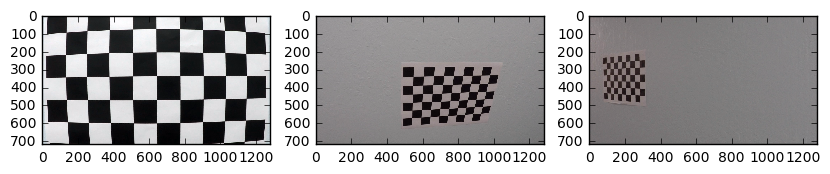

In [6]:
# Check first two images
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.imshow(cv2.imread(cal_img_files[0]))
ax2.imshow(cv2.imread(cal_img_files[1]))
ax3.imshow(cv2.imread(cal_img_files[2]))
plt.show();

Chessboard has 9 x 6 inner corners except in first image, in which only 9 x 5 are shown.

## Compute camera matrix and distortion coefficients

In [7]:
# prepare object points
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y

mtx, dist = custom_calib.calibrate_camera(nx, ny, cal_img_files, saveimg=True, savepath='01_camera_cal')

### Explanation of custom function `calibrate_camera` 

    mtx, dist = custom_calib.calibrate_camera(nx, ny, cal_img_files, saveimg=True, savepath='01_camera_cal')

    arguments:
        nx, ny: number of inner corners in x and y axis
        cal_img_files: list of chessboard image files names
        saveimg / savepath: options for saving images with corners drawn
    returns: 
        mtx: camera matrix
        dist: distortion coefficients
    
`calibrate_camera` is defined in lines 9 to 52 of file `func_calibration.py`. It follows this steps:

1. Prepare `objpoints` and `imgpoints`: I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image. Thus, objp is just a replicated array of coordinates, and objpoints will be appended with a copy of it every time I successfully detect all chessboard corners in a test image. imgpoints will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

2. Iterate through chessboard images. Read, transform to gray using cv2.cvtColor(), identify `corners`using cv2.findChessboardCorners(). If corners located (that is, if ret==True), add info to objpoints, imgpoints (* first image has one less inner corner in y than the rest so a couple of lines added to address this issue).

3. If saveimg==True, write corners on each image using cv2.drawChessboardCorners() and save to savepath.

4. Use cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None) to compute camera matrix and distortion coefficients

5. Return mtx, dist

## Save mtx and dist to pickle

In [8]:
# Save camera matrix as `mtx.pkl` and distortion coefficients as `dist.pkl`
joblib.dump(mtx, '01_camera_cal/mtx.pkl', compress=3)
joblib.dump(dist, '01_camera_cal/dist.pkl', compress=3)

['01_camera_cal/dist.pkl']

## Example of undistorted chessboard image

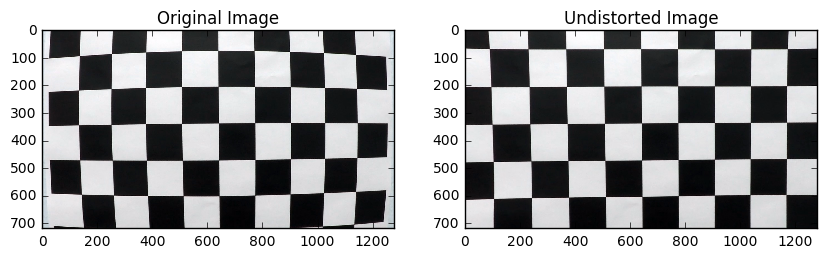

In [9]:
# EXAMPLE: Load image to undistort. Undistort. Save to file and plot result
img = cv2.imread(cal_img_files[0])
custom_calib.undistort_img_example (img, mtx, dist)

# Pipeline (test images)

__Criteria__
* Provide an example of a distortion-corrected image.
* Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.
* Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.
* Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?
* Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.
* Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.


## Undistort: Provide an example of a distortion-corrected image.

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one:
1. Load image
2. use `cv2.undistort()` using mtx and dist previously computed
3. convert to rgb and display

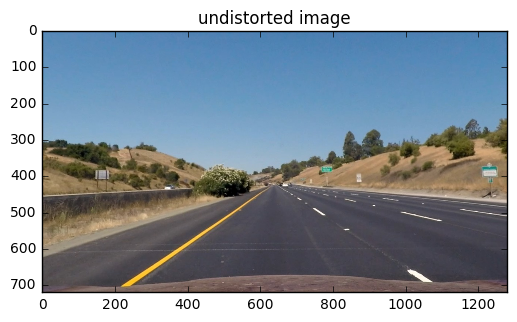

In [10]:
# Read lane image
original_img = cv2.imread(lane_files[0])

# undistort
img = cv2.undistort(original_img, mtx, dist, None, mtx)

#convert to rgb and plot
img_rgb = custom_calib.bgr_to_rgb(img)
plt.imshow(img_rgb)
plt.title('undistorted image');

## Color and gradient threshold

Color and gradient done using custom function `img_thresh` defined in lines 10 to 74 of `func_threshold.py`

This function `img_thresh` works as follows:
- change image to grayscale
- compute absolute gradient thresholded image (custom function `abs_sobel_thresh`, lines 75 to 88.
- compute magnitude gradient thresholded image (custom function `mag_thresh`, lines 90 to 103.
- compute direction/angle gradient thresholded image (custom function `dir_threshold`, lines 119 to 140.
- compute S-channel gradient thresholded image (custom function `hls_select`, lines 105 to 117.
- combine threshold image (keep ones in absolute_threshold and s_channel threshold, and remove pixels that not pass direction threshold.
- return combined image plus the other thresholded image (the later for development of model)

Arguments:

        img: image to transform
        absg_thresh: threshold for absolute gradient
        magg_thresh: threshold for magnitude gradient
        magg_kernel: kernel to use in magnitude gradient
        dirg_thresh: threshold for direction gradient
        dirg_kernel: kernel to use in direction gradient
        s_ghresh: thershold for s channel
        plot_thresh: if True, plot image trhesholded by abs, magnitude, direction and s-channel

return:

        (combined_binary*255, sxbinary, sxmagbinary, sxanglebinary, s_binary)
        where combined_binary*255 is thresholded final image,
        sxbinary is binary with absolute threshold
        sxmagbinary is binary with magnitude threshold
        sxanglebinary is binary with direction threshold
        s_binary is binary with s_channel threshold
       

In [11]:
# Options used
options = { 'absg_thresh' : (30,100),
            'magg_thresh' : (15,100),  'magg_kernel' : 3,
            'dirg_thresh' : (0.5,1.5), 'dirg_kernel' : 3,
            's_thresh' : (100,255),
            'plot_thresh': True}

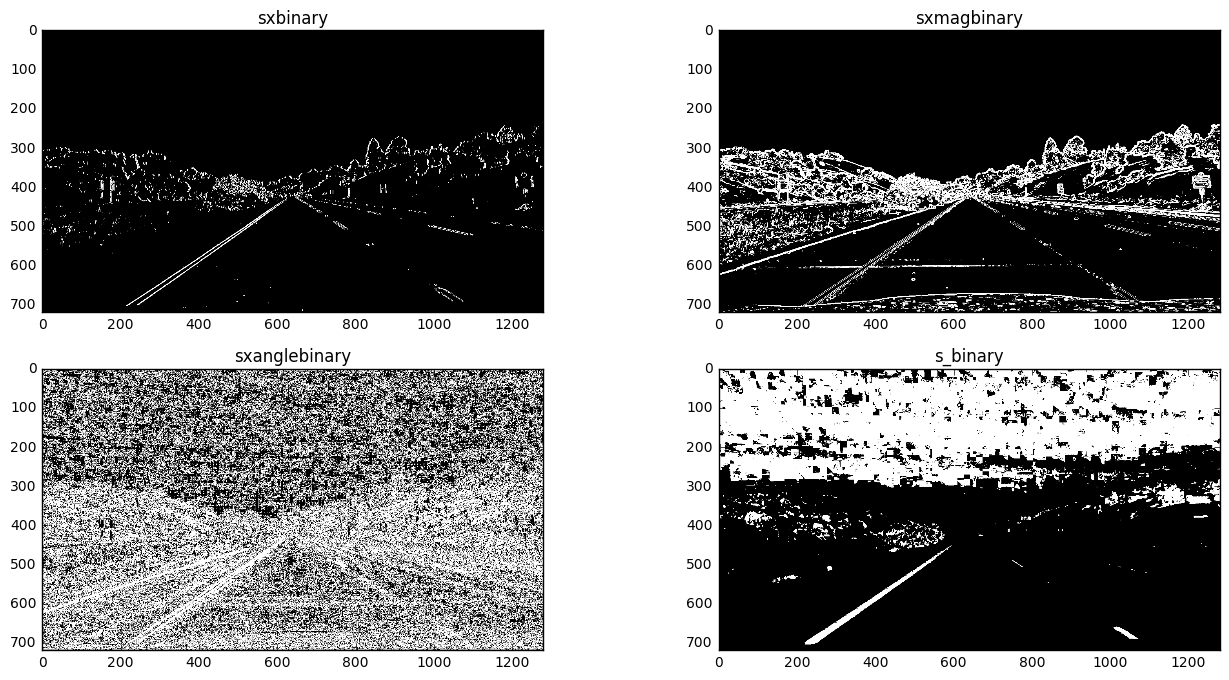

In [12]:
img2 = img.copy()
combined_binary,sxbinary, sxmagbinary, sxanglebinary, s_binary = custom_th.img_thresh(img, **options)

### Plot combined binary image

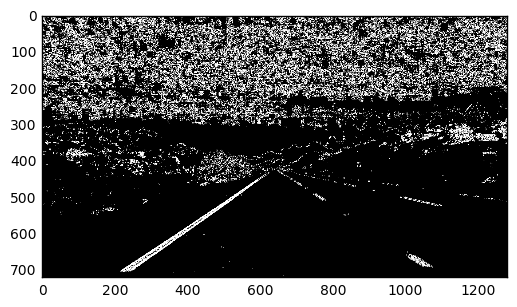

In [13]:
plt.imshow(combined_binary, cmap='gray');

## Perspective transform

### Compute Transformation matrices (direct and inverse transformation)
After identifying four source points for my perspective transform (visually, checked ok using plot), I use a custom function (`perspective_transform`, defined in lines 14 to 35 of `custom_perspective.py`) to compute transformation matrices and to plot in an image the plane used.

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 260, 680      | 320, 720      | 
| 596, 450      | 320, 0        |
| 688, 450      | 1024, 0       |
| 1024, 680     | 1024, 720     |

Basically, the perspective_transform computes matrices as follows:

    M = cv2.getPerspectiveTransform(src, dst)

Both matrices (direct/inverse transformation) as well as source and destination points are saved as pickle files.

Plot points to use for perspective transformation


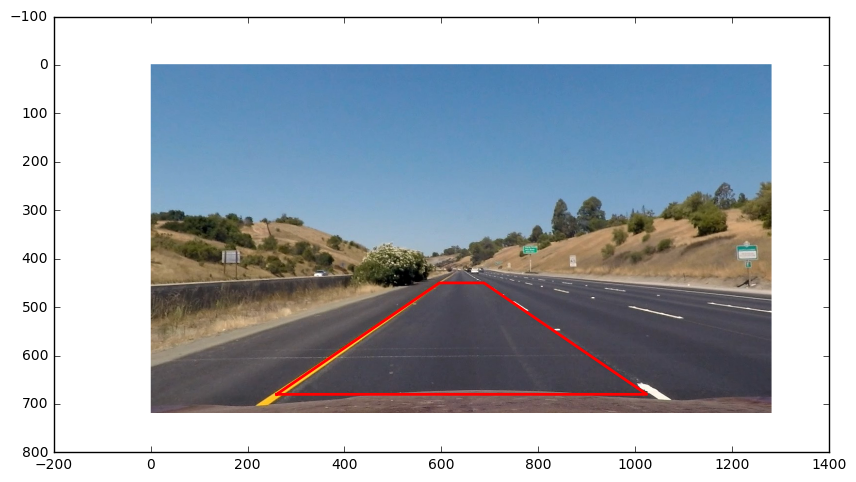

['03_perspective_transform/dst.pkl']

In [14]:
img_rgb = custom_calib.bgr_to_rgb(img)

p1 = (260,680)
p2 = (596,450)
p3 = (688,450)
p4 = (1024,680)
points = [p1, p2, p3, p4]

M, Minv, src, dst = custom_perspective.perspective_transform(points, img_rgb, combined_binary)

#save info:
joblib.dump(M, '03_perspective_transform/M.pkl', compress=3)
joblib.dump(Minv, '03_perspective_transform/Minv.pkl', compress=3)
joblib.dump(src, '03_perspective_transform/src.pkl', compress=3)
joblib.dump(dst, '03_perspective_transform/dst.pkl', compress=3)

### Apply transformation to an image

Used custom function `apply_transform` that basically takes and image and returns `cv2.warpPerspective(img, M, img_size, flags= cv2.INTER_LINEAR)`

`plot_transformed_img` is just a function that plots resulting transforms

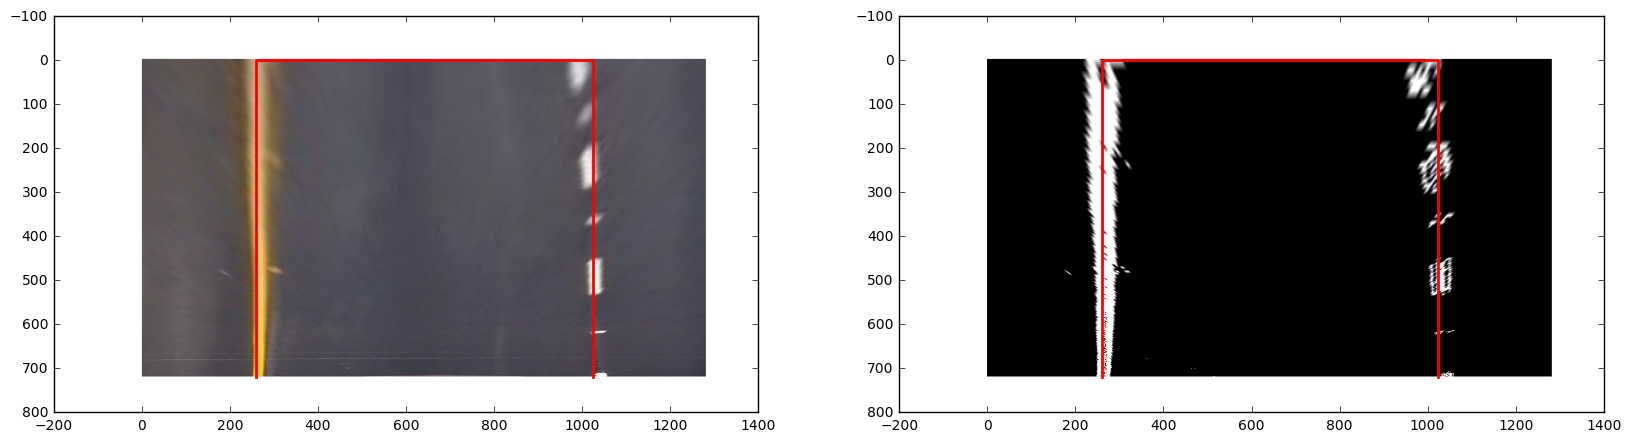

In [15]:
#perspective transform original img and thresholded img
warped_rgb = custom_perspective.apply_transform(img_rgb, M)
warped_thresh = custom_perspective.apply_transform(combined_binary, M)

#Plot images
custom_perspective.plot_transformed_img (warped_rgb, warped_thresh, dst)

## Detect lane pixels and fit to find the lane boundary.

### Detect lane pixels using histogram and  sliding windows

Process is as follows: plot histogram of lower 'img_use' percentage of image. Compute location where most one pixels are (for left side and right side... those are taken of position of left and right lanes at base of image).

Using estimated position in base of image, draw window (120 width, img_height/15 height). Compute pixels inside. If necessary, adjust center of windows. Repeat for following window on top... until all image is covered.

For each window, store detected pixels as leftx, lefty, rightx, righty.

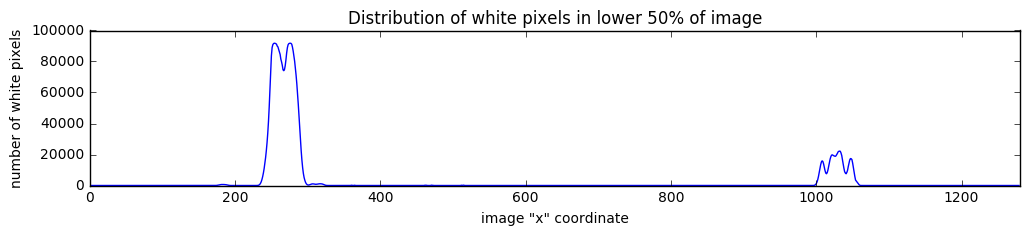

Left x starting position: 276, right x starting position: 1032


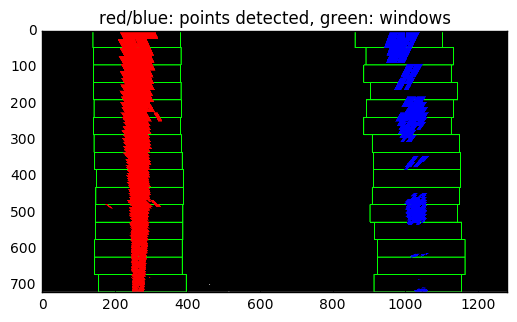

In [16]:
img = warped_thresh

plots=True #if plots should be drawn
img_use = 0.5 #lowest percentage of image to use in histogram
draw_windows=True # if sliding windows should be drawn image
nwindows=15 #number of sliding windows
margin=120 #width of windows
minpix=100 #minimum number of pixels that produce horizontal movement of sliding window

#Detect line pixels. Use histograms to detect starting position
leftx, lefty, rightx, righty = custom_detect.detect_lane_line_pixels (img, nwindows, margin, 
                                                                      minpix, draw_windows=True, 
                                                                      plots=True, img_use=img_use)

### Fit 2nd order polynomial

Used `adjust_polynomial` function (lines 117 to 149 of `func_detect.py`. Steps

- use `np.polyfit()` to obtain coefficients for second order polynomial in pixels. Repeat using ym_per_pixel and xm_per_pixel for fitting using meters mesure unit.
- using coefficients, compute x pixels for given y, for left and right lanes (compute left_fitx, right_fity, ploty)
- At bottom of image, compute radious of curvature 
<img src='04_detection/polynomial.png'>
<img src='04_detection/formula.png'>
- Plot detected pixels and polynomial line (in yellow)

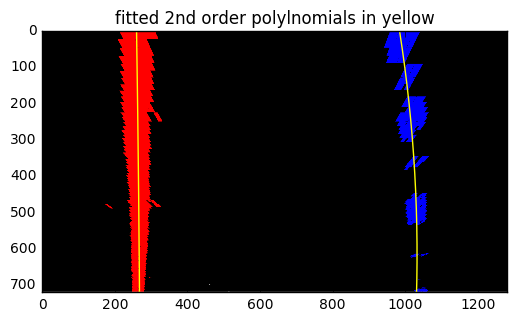

In [17]:
#Find points corresponding to a fitted polynomial
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

left_fitx, right_fitx, left_curverad, right_curverad, left_curverad_cr, right_curverad_cr = \
            custom_detect.adjust_polynomial(warped_thresh, leftx, lefty, rightx, righty, ym_per_pix, xm_per_pix)

custom_detect.plot_detected_pixels_and_line(warped_thresh, leftx, lefty, rightx, righty, left_fitx, right_fitx)

### Compute vehicle offset

Radious of curvature for both lanes computed in previous section.Final radious of curvature is mean value.

Offset computed using `compute_vehicle_offset` (lines 167 to 173 of `func_detect.py`). Basically consist on taking x values of lane at base of image and compute desviation from center of image (assumed is center of car)

In [18]:
# Example curvature values: 1926.74 1908
curve = .5*left_curverad_cr + .5*right_curverad_cr
print('Radius of curvature: \t{:.2f}m'.format(curve))

Radius of curvature: 	14285.66m


In [19]:
#offset
offset = custom_detect.compute_vehicle_offset(img, leftx, lefty, rightx, righty, xm_per_pix)
print (offset, ' metres')

0.0185  metres


## Warp the detected lane boundaries back onto the original image

Lane painted in binary image using `paint_lane`(defined in lines 175 to 190 of `func_detect.py`). 

Then, unwarp image using `cv2.warpPerspective` and merge into original image using `cv2.addWeigthed`

No undistort step done  (not deemed necessary for visualization)

Add annotation in final image of radious and offset values, using `plt.text()`

In [20]:
img_size = (img.shape[1], img.shape [0]) 

#paint lane in green
result = custom_detect.paint_lane(img, leftx, lefty, rightx, righty, left_fitx, right_fitx)

#Invert transformation of lane-painted image and merge into original image
unwarped = cv2.warpPerspective(result, Minv, img_size, flags= cv2.INTER_LINEAR)
final_img = cv2.addWeighted(unwarped, 1,img_rgb , 1., 0)

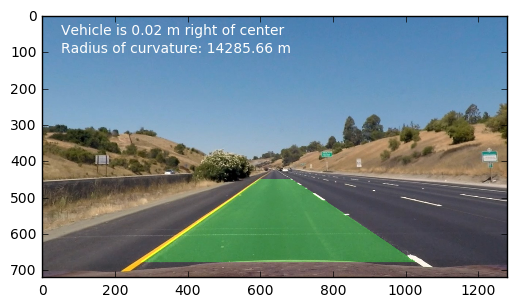

In [21]:
# plt.imshow(unwarped)
plt.imshow(final_img)
if (offset >=0.):
    txt = ('Vehicle is {:.2f} m right of center'.format(np.abs(offset)))
    plt.text(50, 50, txt, fontdict=None, withdash=False, color='white')
else:
    txt = ('Vehicle is {:.2f} m left of center'.format(np.abs(offset)))
    plt.text(50, 50, txt, fontdict=None, withdash=False, color='white')

curve = .5*left_curverad_cr + .5*right_curverad_cr
plt.text(50, 100, 'Radius of curvature: {:.2f} m'.format(curve), fontdict=None, withdash=False, color='white');

# Pipeline (video)

* Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)


In [28]:
painted_output = 'output_video/project_video_processed.mp4'

clip1 = VideoFileClip("data/project_video.mp4", audio=False)

In [29]:
white_clip = clip1.fl_image(custom_pipe.process_image)

In [30]:
%time white_clip.write_videofile(painted_output, audio=False)

[MoviePy] >>>> Building video output_video/project_video_processed.mp4
[MoviePy] Writing video output_video/project_video_processed.mp4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:37<00:00,  3.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/project_video_processed.mp4 

Wall time: 6min 39s
